# Git Stash - Lab

## Introduction

You've started to see some of the awesome power of git as a tool for version control and collaboration. Sometimes, workflows aren't quite as linear or straightforward as those examples we've discussed thus far. For example, if both the local and remote versions of a repository have been updated at the same time, you may encounter merge conflicts! Essentially, git is unsure of which changes to incorporate if both versions of the repository have changed the same line of the same file. In these cases, git stash can be a valuable tool: it allows you to *stash* away your changes for later use!
                                       

## Objectives

You will be able to:

* Explain some use cases for `git stash`
* Use a git stash to store changes
* Apply stashed changes to multiple branches

## Return to Your Git Repository/Folder from the Git Merge Lab

Since we're doing another git investigation, let's start by working from our previously created git repository.

## Check `git status`

Hopefully you should see the usual:  

```On branch master
nothing to commit, working tree clean
```

If not, add and commit your changes and recheck git status.

## Make Some Changes

Now that we have a clean working directory, let's muck things up! (Sorry if you already had a untracked changes and cleaned them up; it's good practice at the very least!)

Once again, let's modify numbers.py. Open up the file from the command line with `nano numbers.py` and modify the script so that it prints the fourth power of numbers. The script should look like this:

```for i in range(10):
    print(i**4)
```

## Check `git status` Again

This time, you should see something like:

```
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   numbers.py

no changes added to commit (use "git add" and/or "git commit -a")
```

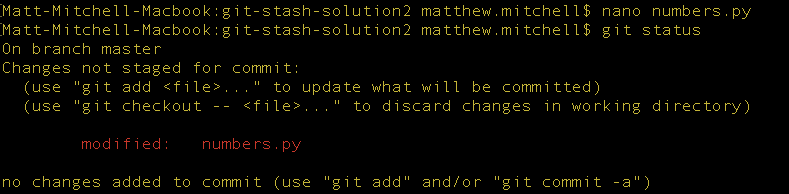

## Try Out `git stash`

Now for our new wizardry! Execute the command `git stash`. Afterwards, do another `git status` to see what's going on.

## Further Exploration: `git stash list`, `git stash show`, and `git stash apply`

You should see that we're back to a clean working tree. You can further see this by using the bash command `cat` which will print the contents of a file to the command line, so in this case try out `cat numbers.py`. You should see that our file has reverted back to the previous version where we were actually cubing our numbers.

So what happened to our changes? Where did they go? We stashed them. To see stashes, you can use the command `git stash list`. Try it out now. 

If you want a few more details about the stash, you can use `git stash show`. Again, give it a try.

Finally, if you want to reimplement your stashed changes you can use `git stash apply`. Let's go ahead and reapply our changes (raising numbers to the fourth power rather then the third). 

Once you do that, you'll see a message as if we did `git status`, and you'll see that we once again have changes that have not been added or commited. What's more, while we've applied our stash, the stash still exists (you can see this once again with `git stash list`.

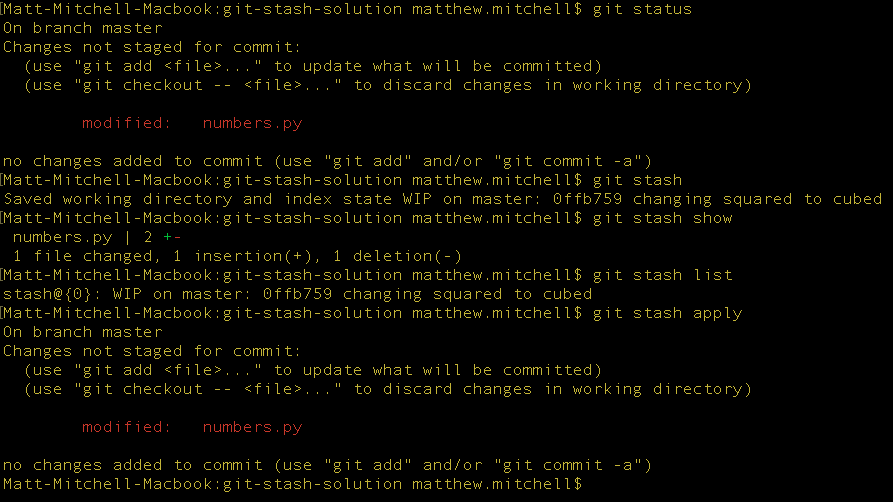

## See All of the Commit History

As a friendly reminder, you can see all of the commit history to date with `git log --graph`.

## Create a New Branch beta

Next, we're going to briefly investigate some merge conflicts. These occur when you have two versions of the same file which both have the same line modified. This typically occurs when merging branches as we cleanly did in the last lab. Here, we'll cause the same behavior to occur by modifying our new branch and then attempting to apply our stashed changes.

If you haven't already, create a new branch called beta.

`git checkout -b beta`

## On Your New Branch, Modify numbers.py To Raise Numbers to the 5th Power

Once you modify the script, take a look at the state of affairs with `git status`. Then add and commit your changes with an appropriate description.

## Merge Conflicts

Now for the fun part. We're going to create a merge conflict. Execute `git stash apply`.

You should be presented with a message:

```
Auto-merging numbers.py
CONFLICT (content): Merge conflict in numbers.py
```

What's more, if you open up numbers.py with `nano numbers.py`, you'll see some bizarre changes:

<img src="images/stash_merge_conflict.png" width=750>

So what do all of these symbols mean?

* `<<<<<<< Updated Upstream` - the beginning of the original branch (beta)
* `=======` - the end of the original branch/the beginning of the branch being merged in (our stashed changes)
* `>>>>>>> Stashed changes` - the end of our stashed changes

This is because our new branch and the stashed changes modified the same line of the same file. Specifically, both modified line 2 of the numbers.py file. As such, git is unsure of which version of line 2 we wish to incorporate. It has highlighted this for us, and its now our job to manually modify the file to resolve these conflicts, keeping the version we are interested in.

As a further note, this is why development would generally be seperated by files, or at the very least, sections of files; we can avoid merge conflicts and continue to collaborate together working seemlessly on a project. 

You're numbers.py file should now be back to numbers raised the the 4th degree as such:

```
for i in range(10):
    print(i**4)
```

(To do this, we simply manually opened up the file with nano and resolved the merge conflicts, including removing the notes left for us by git.)

Checking `git status`, we now see that we have once again modified numbers.py. As usual, we can now add and commit those changes to our version history. 

## Additional Resources

[Git Stash Documentation](https://www.git-scm.com/docs/git-stash)

## Summary

In this lesson we took a look at git stash as well as merge conflicts, and how to resolve them. Git stash is often useful when you need to quickly store away your changes and don't wish to create a new branch; you intend to quickly reintroduce these changes but need to put them to the side for a moment. This can be helpful if the remote repository has been updated and you first need to fetch and pull it, but have already also made some changes locally. In this and other cases, it's often easiest to first just stash the changes and then apply them subseqently. Similarly, we also saw that stashed changes can be applied to multiple branches. Overall, the more you use git and its myriad of tools, the more options you'll have for organizing and synchronizing your development process.